In [6]:
# Import relevant libraries

from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2

In [7]:
# Define configuration class

class CFG:
    device = "cpu"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (800, 800)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [8]:
# Load the image generation model without specifying a variant. We use float32 bc of macOS
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id,
    torch_dtype=torch.float32,  # Use float32 for CPU
)

# Move the model to the specified device (CPU)
image_gen_model = image_gen_model.to(CFG.device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

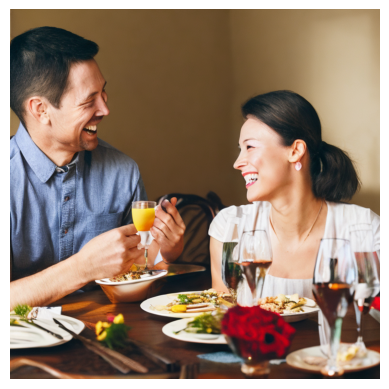

In [9]:
# Function to generate images

def generate_image(prompt, model):
    # Generate an image from the prompt using the model
    image = model(
        prompt, 
        num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]
    
    # Resize the generated image to the specified size in CFG
    image = image.resize(CFG.image_gen_size)
    
    return image

text_prompt = "a man and a woman who are happily married having a dinner"
generated_image = generate_image(text_prompt, image_gen_model)

plt.imshow(generated_image)
plt.axis('off')
plt.show()